**Data Cleaning**

In [2]:
#install librosa on conda
#conda install -c conda-forge librosa

#https://librosa.org/doc/latest/install.html

import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import os
import random

In [10]:
#import datasets
#https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification?resource=download

**Data Augmentation | pudub**

split audio into more parts, then do melSpectrogram 
https://github.com/jiaaro/pydub

pydub does things in milliseconds


In [3]:
#using pydub library
#conda install -c conda-forge pydub 
#conda install ffmpeg

from pydub import AudioSegment
from pydub.playback import play

# song1 = AudioSegment.from_wav("Data/genres_original/rock/rock.00000.wav")
# song2 = librosa.load("Data/genres_original/rock/rock.00000.wav")
#print('playing sound using pydub' + str(song.duration_seconds))
#play(song)

def audiosegment_to_librosawav(audiosegment):    
    channel_sounds = audiosegment.split_to_mono()
    samples = [s.get_array_of_samples() for s in channel_sounds]

    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(samples[0].typecode).max
    fp_arr = fp_arr.reshape(-1)

    return fp_arr


In [133]:
#pip install torchaudio
import torchaudio
import torch

#slice each audio file into 3 parts and put into MoreData file
#generate Splitmelspectrogram 
# pydub does things in milliseconds

In [139]:
def func0(cls):
  img_names = os.listdir("Data/genres_original/"+cls)

  if not os.path.exists('SplitmelSpect/train/'+cls): 
    #does not exist
    os.makedirs('SplitmelSpect/train/'+cls)
    os.makedirs('SplitmelSpect/test/'+cls)
  
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
   
    try:
      song = AudioSegment.from_wav("Data/genres_original/"+cls+'/'+nm)
      first_10_seconds = song[:10 * 1000]
      second_10_seconds = song[10 * 1000:20 * 1000]
      last_10_seconds = song[20 * 1000:30 * 1000]

      cnt+=1
      mel_spect = librosa.feature.melspectrogram(y=audiosegment_to_librosawav(first_10_seconds), sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      plt.savefig('SplitmelSpect/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      mel_spect = librosa.feature.melspectrogram(y=audiosegment_to_librosawav(second_10_seconds), sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      plt.savefig('SplitmelSpect/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      mel_spect = librosa.feature.melspectrogram(y=audiosegment_to_librosawav(last_10_seconds), sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      plt.savefig('SplitmelSpect/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()



    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error


  cnt = 0
  for nm in test_names:
   
    try:
      song = AudioSegment.from_wav("Data/genres_original/"+cls+'/'+nm)
      first_10_seconds = song[:10 * 1000]
      second_10_seconds = song[10 * 1000:20 * 1000]
      last_10_seconds = song[20 * 1000:30 * 1000]

      cnt+=1
      mel_spect = librosa.feature.melspectrogram(y=audiosegment_to_librosawav(first_10_seconds), sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      plt.savefig('SplitmelSpect/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      mel_spect = librosa.feature.melspectrogram(y=audiosegment_to_librosawav(second_10_seconds), sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      plt.savefig('SplitmelSpect/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      mel_spect = librosa.feature.melspectrogram(y=audiosegment_to_librosawav(last_10_seconds), sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      plt.savefig('SplitmelSpect/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()


    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error

In [140]:
classes = [a for a in os.listdir('Data/genres_original/') if '.' not in a]
print(classes)

for c in classes:
    func0(c)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
Got an exception:  Decoding failed. ffmpeg returned error code: 1

Output from ffmpeg/avlib:

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/opt/concourse/worker/volumes/live/d5b9ea1c-8223-4ff6-7416-83e6b4cd6874/volume/ffmpeg_1587154914508/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --e

**Generate wavelet**

In [54]:
def func1(cls):
  img_names = os.listdir("Data/genres_original/"+cls)

  if not os.path.exists("wavelets/train/"+cls):
    os.makedirs("wavelets/train/"+cls)
    os.makedirs("wavelets/test/"+cls)
 
  train_names = img_names[:60]
  test_names = img_names[60:]
  
  cnt = 0
  for nm in train_names:
    cnt+=1

    try:
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      #plt.figure(figsize=(14, 5))
      librosa.display.waveshow(x)
      plt.savefig('wavelets/train/{}/{}.png'.format(cls,str(cnt)))
      plt.close()
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error
    
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    try:
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      #plt.figure(figsize=(14, 5))
      librosa.display.waveshow(x)
      plt.savefig('wavelets/test/{}/{}.png'.format(cls,str(cnt)))
      plt.close()
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)

In [55]:
classes = [a for a in os.listdir('Data/genres_original/') if '.' not in a]
print(classes)

for c in classes:
    func1(c)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


/Users/joditan/opt/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Got an exception:   Data/genres_original/jazz/jazz.00054.wav


**Generate Spectogram**

In [9]:
def func2(cls):
  img_names = os.listdir("Data/genres_original/"+cls)

  if not os.path.exists("spectogram/train/"+cls):
    os.makedirs('spectrogram/train/'+cls)
    os.makedirs('spectrogram/test/'+cls)

  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    try:
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      X = librosa.stft(x)
      Xdb = librosa.amplitude_to_db(abs(X))
      librosa.display.specshow(Xdb)
      plt.savefig('spectrogram/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    try:
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      X = librosa.stft(x)
      Xdb = librosa.amplitude_to_db(abs(X))
      librosa.display.specshow(Xdb)
      plt.savefig('spectrogram/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error

In [12]:
# classes = [a for a in os.listdir('Data/genres_original/') if '.' not in a]
# print(classes)

classes = ['jazz']

for c in classes:
    func2(c)

/Users/joditan/opt/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Got an exception:   Data/genres_original/jazz/jazz.00054.wav


**Generate Spectogram with mel scaling**

In [3]:
def func3(cls):
  img_names = os.listdir("Data/genres_original/"+cls)

  if not os.path.exists('melspect/train/'+cls): 
    #does not exist
    os.makedirs('melspect/train/'+cls)
    os.makedirs('melspect/test/'+cls)
  
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    try:
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      mel_spect = librosa.feature.melspectrogram(y=x, sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      plt.savefig('melspect/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error


  cnt = 0
  for nm in test_names:
    cnt+=1
    try:
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      mel_spect = librosa.feature.melspectrogram(y=x, sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
      librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      plt.savefig('melspect/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error


In [4]:
classes = [a for a in os.listdir('Data/genres_original/') if '.' not in a]
print(classes)

for c in classes:
    func3(c)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


/Users/joditan/opt/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Got an exception:   Data/genres_original/jazz/jazz.00054.wav


**Generate mfcc**

better for human speech

In [44]:
def func4(cls):
  img_names = os.listdir("Data/genres_original/"+cls)

  if not os.path.exists('mfcc/train/'+cls): 
    #does not exist
    os.makedirs('mfcc/train/'+cls)
    os.makedirs('mfcc/test/'+cls)
  
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    cnt+=1
    try:
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      mfcc_song = librosa.feature.mfcc(y=x, n_mfcc=13, sr=sr)
      librosa.display.specshow(mfcc_song, x_axis="time", sr=sr)
      plt.savefig('mfcc/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error
  
  cnt = 0
  for nm in test_names:
    cnt+=1
    try: 
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      mfcc_song = librosa.feature.mfcc(y=x, n_mfcc=13, sr=sr)
      librosa.display.specshow(mfcc_song, x_axis="time", sr=sr)
      plt.savefig('mfcc/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error

In [ ]:
classes = [a for a in os.listdir('Data/genres_original/') if '.' not in a]
print(classes)

for c in classes:
    func4(c)

**Data Augmentation | SpecAugement:**
Time mask and Frequency mask

https://www.kaggle.com/code/davids1992/specaugment-quick-implementation/notebook

In [ ]:
#SpecAugment on melSpectogram

#conda install -c pytorch torchaudio 
# import torch
# import torchaudio
# import torchaudio.transforms as T

#torchaudio implements torchaudio.transforms.TimeStretch(), torchaudio.transforms.TimeMasking() and torchaudio.transforms.FrequencyMasking().
#cant seem to work using pytorch or tensorflow

#using custom function
def spec_augment(spec: np.ndarray, num_mask=1, 
                 freq_masking_max_percentage=0.15, time_masking_max_percentage=0.3):

    spec = spec.copy()
    for i in range(num_mask):
        all_frames_num, all_freqs_num = spec.shape
        freq_percentage = random.uniform(0.0, freq_masking_max_percentage)
        
        num_freqs_to_mask = int(freq_percentage * all_freqs_num)
        f0 = np.random.uniform(low=0.0, high=all_freqs_num - num_freqs_to_mask)
        f0 = int(f0)
        spec[:, f0:f0 + num_freqs_to_mask] = 0

        time_percentage = random.uniform(0.0, time_masking_max_percentage)
        
        num_frames_to_mask = int(time_percentage * all_frames_num)
        t0 = np.random.uniform(low=0.0, high=all_frames_num - num_frames_to_mask)
        t0 = int(t0)
        spec[t0:t0 + num_frames_to_mask, :] = 0
    
    return spec
    

In [ ]:
#append to melspectrogram train/cls 
#mask for 4 rounds means 1 wav will have 5 variations

def func5(cls):
  img_names = os.listdir("Data/genres_original/"+cls)

  if not os.path.exists('melspectMask/train/'+cls): 
    #does not exist
    os.makedirs('melspectMask/train/'+cls)
    os.makedirs('melspectMask/test/'+cls)
  
  train_names = img_names[:60]
  test_names = img_names[60:]
  cnt = 0
  for nm in train_names:
    try: 
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      mel_spect = librosa.feature.melspectrogram(y=song, sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

      #librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      cnt+=1
      plt.imshow(mel_spect,aspect= 'auto')
      plt.savefig('melspectMask/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      #specAugment 4 times
      cnt+=1
      plt.imshow(spec_augment(mel_spect),aspect= 'auto')
      plt.savefig('melspectMask/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      plt.imshow(spec_augment(mel_spect),aspect= 'auto')
      plt.savefig('melspectMask/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      plt.imshow(spec_augment(mel_spect),aspect= 'auto')
      plt.savefig('melspectMask/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      plt.imshow(spec_augment(mel_spect),aspect= 'auto')
      plt.savefig('melspectMask/train/'+cls+'/'+str(cnt)+'.png')
      plt.close()

    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error

    
  
  cnt = 0
  for nm in test_names:
    try:
      x , sr = librosa.load("Data/genres_original/"+cls+'/'+nm)
      mel_spect = librosa.feature.melspectrogram(y=song, sr=sr, n_fft=2048, hop_length=1024)
      mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

      #librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
      cnt+=1
      plt.imshow(mel_spect,aspect= 'auto')
      plt.savefig('melspectMask/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      #specAugment 4 times
      cnt+=1
      plt.imshow(spec_augment(mel_spect),aspect= 'auto')
      plt.savefig('melspectMask/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      plt.imshow(spec_augment(mel_spect),aspect= 'auto')
      plt.savefig('melspectMask/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      plt.imshow(spec_augment(mel_spect),aspect= 'auto')
      plt.savefig('melspectMask/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()

      cnt+=1
      plt.imshow(spec_augment(mel_spect),aspect= 'auto')
      plt.savefig('melspectMask/test/'+cls+'/'+str(cnt)+'.png')
      plt.close()
      
    except Exception as e:
      print("Got an exception: ", e, 'Data/genres_original/'+cls+'/'+nm)
      #jazz 00054 has an error

In [ ]:
classes = [a for a in os.listdir('Data/genres_original/') if '.' not in a]
print(classes)

for c in classes:
    func5(c)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


/Users/joditan/opt/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


Got an exception:   Data/genres_original/jazz/jazz.00054.wav


**Example on one audio file**

In [4]:
#attempt to split
from pydub import AudioSegment
from pydub.playback import play

#pip install fleep
#import fleep

song1 = AudioSegment.from_wav("Data/genres_original/rock/rock.00000.wav")
song2 = librosa.load("Data/genres_original/rock/rock.00000.wav")
#print('playing sound using pydub' + str(song1.duration_seconds))
#play(song1)


#slice each audio file into 3 parts and put into MoreData file
#generate Splitmelspectrogram 
# pydub does things in milliseconds
first_10_seconds = song1[:10 * 1000]
print(first_10_seconds.duration_seconds)
print(audiosegment_to_librosawav(first_10_seconds))
#play(first_10_seconds)

second_10_seconds = song1[10 * 1000:20 * 1000]
print(second_10_seconds.duration_seconds)
#play(second_10_seconds)

last_10_seconds = song1[20 * 1000:30 * 1000]
print(last_10_seconds.duration_seconds)

print(song2)

10.0
[-0.03344829 -0.0549028  -0.05435346 ... -0.3696402  -0.33722952
 -0.24576555]
10.0
10.0
(array([-0.03344727, -0.05490112, -0.05435181, ..., -0.08416748,
        0.02886963,  0.1296997 ], dtype=float32), 22050)


In [10]:
#get 2d array for lstm
#One dimension represents time while the other dimension represents the different frequencies.
song, sr = librosa.load("Data/genres_original/rock/rock.00000.wav")
mfcc=librosa.feature.mfcc(y=song, sr=sr, hop_length=1024,n_mfcc=13)
print(mfcc)

[[-239.80598    -110.24906     -62.349373   ... -183.99889
  -170.67863    -108.661736  ]
 [ 101.73093     138.81053     147.51898    ...   54.367554
    70.11755      78.540695  ]
 [ -14.930155    -39.43387     -46.29222    ...   -5.2022657
   -24.471596    -34.73387   ]
 ...
 [ -11.440305    -11.236584     -7.314098   ...  -27.418312
   -23.843662      6.744151  ]
 [  18.666576      5.4236507     3.368583   ...  -10.069469
    -4.2432437    -5.619728  ]
 [  -0.63663757   -6.9852076   -20.515684   ...  -18.437124
   -21.870213    -11.134045  ]]


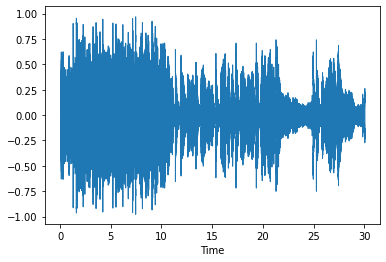

In [ ]:
song, sr = librosa.load("Data/genres_original/rock/rock.00000.wav")
librosa.display.waveshow(song)

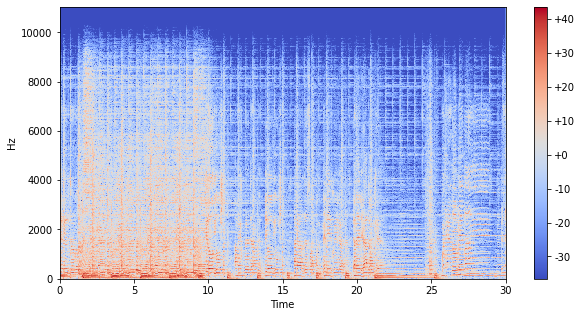

In [ ]:
#STFT: convert audio into frequency spectogram

def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(Y, sr=sr, hop_length=1024, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")
Y_log = librosa.power_to_db(np.abs(librosa.stft(song, hop_length=1024))**2)
plot_spectrogram(Y_log, sr, 1024)

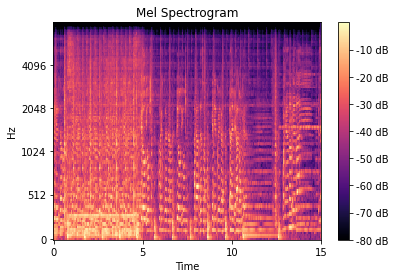

In [ ]:
# song, sr = librosa.load("Data/genres_original/rock/rock.00000.wav")

# spec = np.abs(librosa.stft(song, hop_length=1024))
# spec = librosa.power_to_db(spec)
# librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
# plt.colorbar(format='%+2.0f dB');
# plt.title('Spectrogram');

mel_spect = librosa.feature.melspectrogram(y=song, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

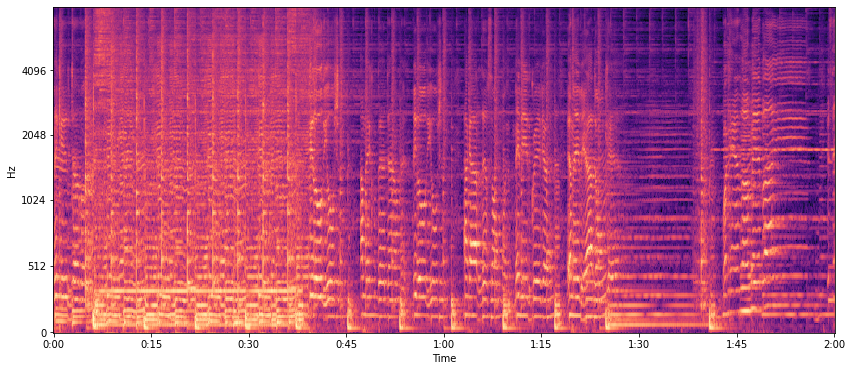

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y=song, sr=sr, n_mels=256, hop_length=128, fmax=8000)
plt.figure(figsize=(14, 6))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel', fmax=8000) 

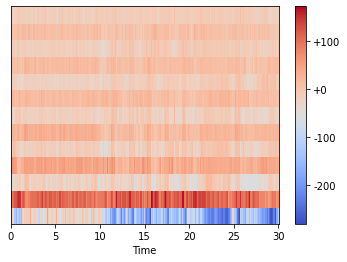

In [ ]:
#mfcc: refuct noise, normalise spectral shape
mfcc_song = librosa.feature.mfcc(y=song, n_mfcc=13, sr=sr)
#plt.figure(figsize=(15, 8))
librosa.display.specshow(mfcc_song, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
#specAugment from melspectogram
#I tried but cannot seem to pip install specAugment from pytorch or tensorflow

#using custom function
def spec_augment(spec: np.ndarray, num_mask=1, 
                 freq_masking_max_percentage=0.15, time_masking_max_percentage=0.3):

    spec = spec.copy()
    for i in range(num_mask):
        all_frames_num, all_freqs_num = spec.shape
        freq_percentage = random.uniform(0.0, freq_masking_max_percentage)
        
        num_freqs_to_mask = int(freq_percentage * all_freqs_num)
        f0 = np.random.uniform(low=0.0, high=all_freqs_num - num_freqs_to_mask)
        f0 = int(f0)
        spec[:, f0:f0 + num_freqs_to_mask] = 0

        time_percentage = random.uniform(0.0, time_masking_max_percentage)
        
        num_frames_to_mask = int(time_percentage * all_frames_num)
        t0 = np.random.uniform(low=0.0, high=all_frames_num - num_frames_to_mask)
        t0 = int(t0)
        spec[t0:t0 + num_frames_to_mask, :] = 0
    
    return spec
    

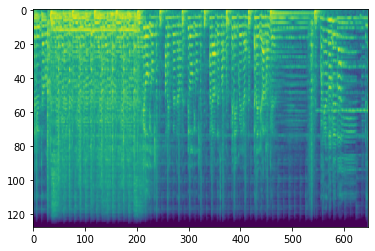

In [ ]:
plt.imshow(mel_spect,aspect= 'auto')
plt.savefig('try.png')

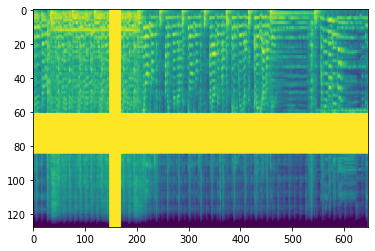

In [ ]:
plt.imshow(spec_augment(mel_spect),aspect= 'auto')
plt.savefig('try.png')

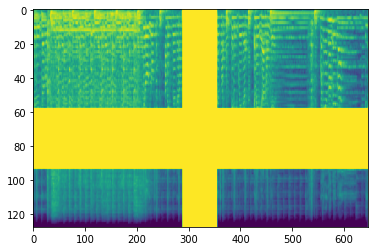

In [ ]:
#another mask variation
plt.imshow(spec_augment(mel_spect),aspect= 'auto')

**Feature Extraction**

features alr there, dk if we wanna use the csv
need to preprocess some columns
https://www.clairvoyant.ai/blog/music-genre-classification-using-cnn